In [1]:
from simsopt._core import load
# replace "NAME_OF_FILE_YOU_DOWNLOADED" with the name you gave the file
surfaces, ma, coils = load(f'serial0229079.json')

In [2]:
from mayavi import mlab

for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [8]:
for surf in surfaces:
    surf.plot(engine='mayavi', show=False)
mlab.show()

In [3]:
from pyoculus.problems import SimsoptBfieldProblem, surf_from_coils

In [4]:
surf = surf_from_coils(coils, ncoils=3, mpol=5, ntor=5)

{'ncoils': 3, 'mpol': 5, 'ntor': 5}


In [8]:
surf.plot(engine='mayavi', show=False)
mlab.show()

In [5]:
R0, _, Z0 = ma.gamma()[0,:]
ps = SimsoptBfieldProblem.from_coils(R0=R0, Z0=Z0, Nfp=3, coils=coils, interpolate=True, ncoils=3, mpol=5, ntor=5, n=40)

{'ncoils': 3, 'mpol': 5, 'ntor': 5, 'n': 40}


In [6]:
import numpy as np

In [27]:
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]

nfieldlines = 40
Rs = np.linspace(0.869, 1.3, nfieldlines)
Zs = np.zeros_like(Rs)
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

# nfieldlines = 2
# p1 = np.array([5.6144507858315915, -0.8067790944375764])
# p2 = np.array([5.78, -0.6])
# Rs = np.linspace(p1[0], p2[0], nfieldlines)
# Zs = np.linspace(p1[1], p2[1], nfieldlines)
# Rs, Zs = np.meshgrid(Rs, Zs)
# RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])

# RZs = np.concatenate((RZs, RZs2))

In [11]:
ps._mf_B.estimate_error_B(10000)

(0.09192514378562332, 0.10725852497898226)

In [28]:
from horus import poincare

In [29]:
pplane = poincare(ps._mf_B, RZs, phis, ps.surfclassifier, tol = 1e-10, plot=False)

In [21]:
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.style.use('lateky')

In [30]:
plt.ioff()
fig, ax = pplane.plot(phis)
ax = ax[0,0]

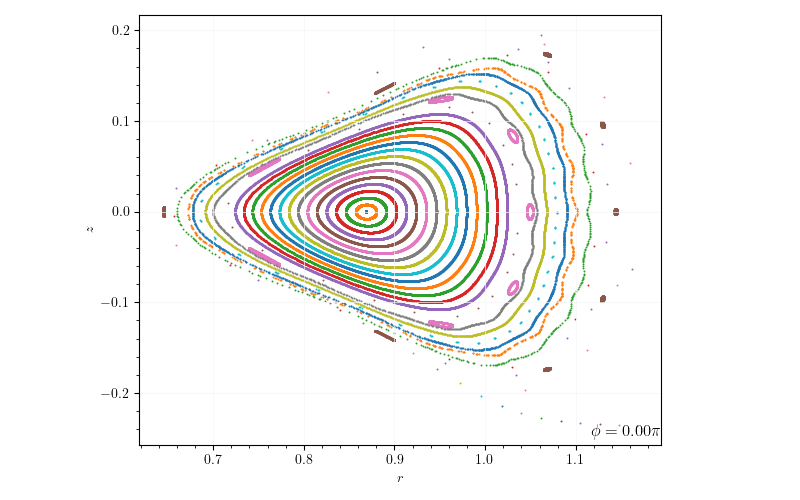

In [31]:
display(fig.canvas)

In [14]:
import horus as ho

In [64]:
gamma = ho.trace(ps._mf, 9*2*np.pi, [1.14386, 0, 0.0], tol=1e-10)[0]

In [65]:
mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))
mlab.show()

In [8]:
from pyoculus.problems import FixedPoint

In [9]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-18
pparams['niter'] = 100

fp1 = FixedPoint(ps, pparams, integrator_params=iparams)
fp2 = FixedPoint(ps, pparams, integrator_params=iparams)

In [10]:
fp1.compute(guess=[1.13535758, 0.07687874], pp=3, qq=8, sbegin=0.62, send=1.2, checkonly=True)

0 - [DeltaR, DeltaZ] : [-8.95871599e-10 -7.13518686e-09] - dtheta : 12.566370181316584
0 - [StepR, StepZ]: [2.90005286e-09 3.89053438e-09]
1 - RZ : [1.13535758 0.07687874] - rhotheta : [0.27758195 0.28062758]
1 - [DeltaR, DeltaZ] : [-1.28785871e-14  9.99200722e-15] - dtheta : 12.566370157734251


In [11]:
fp2.compute(guess=[1.14374773, 0.0203871], pp=3, qq=8, sbegin=0.62, send=1.2, checkonly=True)

0 - [DeltaR, DeltaZ] : [ 8.03439981e-10 -4.97214751e-09] - dtheta : 12.566369933661267
0 - [StepR, StepZ]: [ 4.05947653e-09 -4.37089730e-09]
1 - RZ : [1.14374773 0.0203871 ] - rhotheta : [0.27586795 0.07396908]
1 - [DeltaR, DeltaZ] : [-2.8643754e-14 -2.3411828e-14] - dtheta : 12.56636991895008


In [32]:
results1 = [list(p) for p in zip(fp1.x, fp1.y, fp1.z)]
results2 = [list(p) for p in zip(fp2.x, fp2.y, fp2.z)]

In [33]:
results1

[[1.1353575829000528, 0.0, 0.07687874389053438],
 [1.143747734059569, 0.0, -0.020387095626251402],
 [1.1219137549903382, 0.0, -0.11479070097737704],
 [1.0459821498623518, 0.0, -0.18274170375174756],
 [0.8172764320278105, 0.0, -0.10375158018822576],
 [0.659178494587964, 0.0, 0.03092231918060684],
 [0.9485234630485577, 0.0, 0.16641620861401937],
 [1.0871668505080696, 0.0, 0.16104024047929044],
 [1.13535758290004, 0.0, 0.07687874389054437]]

In [34]:
results2

[[1.1437477340594766, 0.0, 0.0203870956291027],
 [1.135357582900743, 0.0, -0.07687874388776238],
 [1.0871668505103453, 0.0, -0.16104024047728116],
 [0.9485234630555037, 0.0, -0.16641620861730408],
 [0.65917849459208, 0.0, -0.030922319184728028],
 [0.8172764320172968, 0.0, 0.10375158018388073],
 [1.0459821498590451, 0.0, 0.1827417037526993],
 [1.121913754989247, 0.0, 0.1147907009799376],
 [1.143747734059448, 0.0, 0.02038709562907929]]

In [24]:
gamma = ho.trace(ps._mf, 9*2*np.pi, results1[0], tol=1e-10)[0]

mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))
mlab.show()

In [35]:
for rr in results1:
    ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

for rr in results2:
    ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

In [35]:
ax.scatter(results1[0][0], results1[0][2], marker="X", edgecolors="black", linewidths=1)
ax.scatter(results2[0][0], results2[0][2], marker="X", edgecolors="black", linewidths=1)

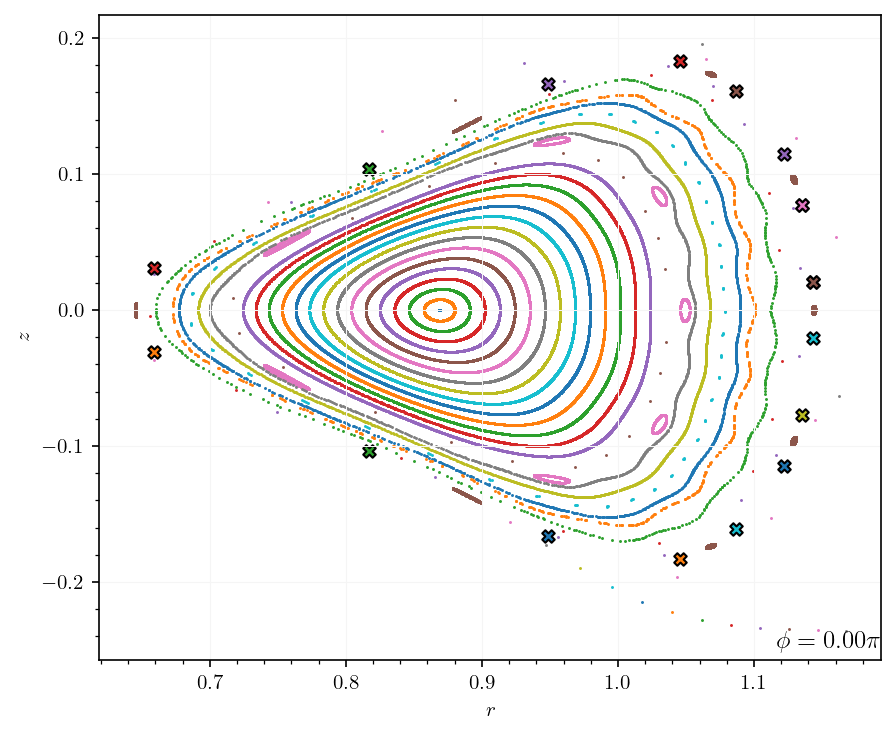

In [25]:
fig

It is a $q=16/6$ 

In [15]:
from pyoculus.solvers import Manifold
iparam = dict()
iparam["rtol"] = 1e-13

mp = Manifold(ps, fp1, fp2, integrator_params=iparam)

In [25]:
mp.choose(signs=[[-1, 1], [-1, 1]])

In [ ]:
mp.show_directions()

In [37]:
mp.inner

{'lfs': {'stable': None, 'unstable': None},
 'clinics': [],
 'rfp_s': array([1.13535758, 0.07687874]),
 'lambda_s': 0.4698866562068522,
 'vector_s': array([ 0.65430623, -0.7562297 ]),
 'rfp_u': array([1.14374773, 0.0203871 ]),
 'lambda_u': 2.128172798410323,
 'vector_u': array([0.45284741, 0.89158804])}

In [38]:
mp.onworking = mp.inner

In [39]:
mp.compute(nintersect = 6, epsilon= 1e-3, neps = 30)

2024-05-30 22:45:13 [info     ] Computing manifold for directions [inner/outer/both]: both
2024-05-30 22:45:13 [info     ] Computing unstable manifold...
2024-05-30 22:46:14 [info     ] Computing stable manifold...
2024-05-30 22:47:39 [warning  ] Both eps_s and epsilon are given, ignoring the eps_s.
2024-05-30 22:47:39 [warning  ] Both eps_u and epsilon are given, ignoring the eps_u.
2024-05-30 22:47:40 [info     ] Computing unstable manifold...
2024-05-30 22:49:10 [info     ] Computing stable manifold...


In [40]:
mp.plot(ax=ax)

(<Figure size 1200x750 with 1 Axes>,
 <Axes: title={'right': '$\\phi = 0.00\\pi$ '}, xlabel='$r$', ylabel='$z$'>)

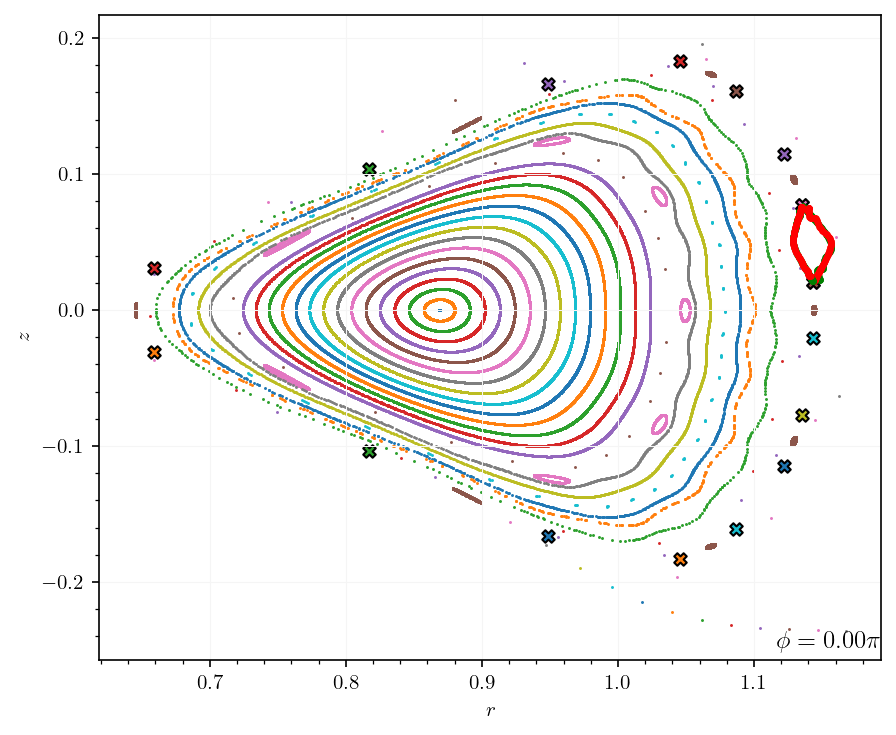

In [50]:
fig

In [ ]:
mp.find_clinic_single(0.0005138103059726661, 0.00045678777236184576, n_s=6, n_u=5, jac=False)

In [45]:
fund = mp.onworking["fundamental_segment"]
guess_i = [fund[0][1]*np.power(mp.onworking["lambda_s"], 1/2), fund[1][0]*np.power(mp.onworking["lambda_u"], 1/2)]
print(f"initial guess: {guess_i}")

initial guess: [0.0007680059921121586, 0.000666373800544537]


In [47]:
mp.find_clinic_single(0.0007397342403824656, 0.0006577310819452291, n_s=5, n_u=5, jac=False)

2024-05-30 23:01:49 [debug    ] Guess - 0.0007680059921121586, 0.000666373800544537
2024-05-30 23:01:49 [debug    ] Bounds - ((0.0007680059921121586, 0.0016700340461991926), (0.000666373800544537, 0.0014467204803989366))
2024-05-30 23:01:49 [debug    ] n_s, n_u - 5, 5
2024-05-30 23:01:49 [debug    ] Inside : (0.0007680059921121583, 0.000666373800544537)
2024-05-30 23:01:52 [debug    ] Returns - (array([1.15671064, 0.04812536]), array([1.15651214, 0.04915719]), array([ 0.0001985 , -0.00103183]))
2024-05-30 23:01:52 [debug    ] Inside : (0.0007680059921121583, 0.000666373800544537)
2024-05-30 23:01:56 [debug    ] Returns - (array([1.15671064, 0.04812536]), array([1.15651214, 0.04915719]), array([ 0.0001985 , -0.00103183]))
2024-05-30 23:01:56 [debug    ] Inside : (0.0007680059921121583, 0.000666373800544537)
2024-05-30 23:02:01 [debug    ] Returns - (array([1.15671064, 0.04812536]), array([1.15651214, 0.04915719]), array([ 0.0001985 , -0.00103183]))
2024-05-30 23:02:01 [debug    ] Inside

(0.0007397342403824656, 0.0006577310819452291)

In [53]:
mp.onworking = mp.outer

In [56]:
mp.find_clinic_single(0.0004935714362365777, 0.0009447855326874471, n_s=5, n_u=5, jac=False)

2024-05-30 23:18:48 [debug    ] Guess - 0.001, 0.001
2024-05-30 23:18:48 [debug    ] Bounds - ((0.001, 0.0021600076402865072), (0.001, 0.002158862150101467))
2024-05-30 23:18:48 [debug    ] n_s, n_u - 5, 5
2024-05-30 23:18:48 [debug    ] Inside : (0.0010000000000000002, 0.0010000000000000002)
2024-05-30 23:18:53 [debug    ] Returns - (array([1.1290709 , 0.05511283]), array([1.13230078, 0.04019071]), array([-0.00322987,  0.01492213]))
2024-05-30 23:18:53 [debug    ] Inside : (0.0010000000000000002, 0.0010000000000000002)
2024-05-30 23:19:00 [debug    ] Returns - (array([1.1290709 , 0.05511283]), array([1.13230078, 0.04019071]), array([-0.00322987,  0.01492213]))
2024-05-30 23:19:00 [debug    ] Inside : (0.0010000000000000002, 0.0010000000000000002)
2024-05-30 23:19:05 [debug    ] Returns - (array([1.1290709 , 0.05511283]), array([1.13230078, 0.04019071]), array([-0.00322987,  0.01492213]))
2024-05-30 23:19:05 [debug    ] Inside : (0.00100000010293358, 0.0010000000000000002)
2024-05-30 2

(0.0004935714362365777, 0.0009447855326874471)

In [61]:
mp.find_clinic_single(0.0007316896189876429, 0.001378277537890097, n_s=4, n_u=5, jac=False)

2024-05-31 00:20:23 [debug    ] Guess - 0.0007316896189876429, 0.001378277537890097
2024-05-31 00:20:23 [debug    ] Bounds - ((0.0007316896189876429, 0.0015800628185817691), (0.001378277537890097, 0.0029827427439305223))
2024-05-31 00:20:23 [debug    ] n_s, n_u - 4, 5
2024-05-31 00:20:23 [debug    ] Inside : (0.0007316896189876431, 0.0013782775378900973)
2024-05-31 00:20:26 [debug    ] Returns - (array([1.13522221, 0.03479514]), array([1.13527743, 0.0347237 ]), array([-5.52189984e-05,  7.14391296e-05]))
2024-05-31 00:20:26 [debug    ] Inside : (0.0007316896189876431, 0.0013782775378900973)
2024-05-31 00:20:31 [debug    ] Returns - (array([1.13522221, 0.03479514]), array([1.13527743, 0.0347237 ]), array([-5.52189984e-05,  7.14391296e-05]))
2024-05-31 00:20:31 [debug    ] Inside : (0.0007316896189876431, 0.0013782775378900973)
2024-05-31 00:20:35 [debug    ] Returns - (array([1.13522221, 0.03479514]), array([1.13527743, 0.0347237 ]), array([-5.52189984e-05,  7.14391296e-05]))
2024-05-31 

(0.0007235978655974428, 0.0013857136248873365)

In [73]:
mp.onworking = mp.inner

In [74]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
confns = mp.onworking["find_clinic_configuration"]
n_u = confns["n_u"]+confns["n_s"]+2

for i, clinic in enumerate(mp.onworking["clinics"]):
    eps_s_i, eps_u_i = clinic[1:3]
    
    hu_i = mp.integrate(mp.onworking["rfp_u"] + eps_u_i * mp.onworking["vector_u"], n_u, 1)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

In [76]:
for man in [mp.inner, mp.outer]:
    mp.onworking = man
    mp.turnstile_area()

2024-05-31 00:30:17 [info     ] Forward integration goes beyond stable saddle point.
2024-05-31 00:30:17 [debug    ] rfp: [1.13535758 0.07687874], rz_end: [1.13534762 0.0767302 ], rz: [1.13540746 0.07675504]
2024-05-31 00:30:53 [info     ] Backward integration goes beyond stable saddle point.
2024-05-31 00:30:53 [debug    ] rfp: [1.14374773 0.0203871 ], rz_end: [1.14369542 0.02053592], rz: [1.14375944 0.02051373]
2024-05-31 00:30:53 [info     ] Potential integration completed for homo/hetero-clinic point of order : 4.568e-04
2024-05-31 00:31:32 [info     ] Forward integration goes beyond stable saddle point.
2024-05-31 00:31:32 [debug    ] rfp: [1.13535758 0.07687874], rz_end: [1.13529432 0.07658994], rz: [1.13536257 0.07671248]
2024-05-31 00:32:08 [info     ] Backward integration goes beyond stable saddle point.
2024-05-31 00:32:08 [debug    ] rfp: [1.14374773 0.0203871 ], rz_end: [1.14369937 0.02056384], rz: [1.1437768  0.02055714]
2024-05-31 00:32:08 [info     ] Potential integratio

In [77]:
mp.inner["areas"]

array([[-1.07981010e-05,  1.62718348e-05,  1.33448150e-05],
       [ 1.07981010e-05,  1.62718348e-05,  1.33448150e-05]])

In [78]:
mp.outer["areas"]

array([[ 1.49072240e-05,  2.07233102e-05,  1.91319854e-05],
       [-1.49072240e-05,  2.07233102e-05,  1.91319854e-05]])

In [79]:
fig_conv, ax_conv = plt.subplots()

# ar = np.zeros((2, 3))
for ii, pot in enumerate(mp.inner["potential_integrations"]):
    ns = min(len(pot[0]), len(pot[1]))
    # ar[ii,:] = pot[0][1:ns]-pot[1][:ns-1]
    ax_conv.scatter(1+np.arange(ns-1), pot[0][1:ns]-pot[1][:ns-1], zorder=10)

for ii, pot in enumerate(mp.outer["potential_integrations"]):
    ns = min(len(pot[0]), len(pot[1]))
    # ar[ii,:] = pot[0][1:ns]-pot[1][:ns-1]
    ax_conv.scatter(1+np.arange(ns-1), pot[0][1:ns]-pot[1][:ns-1], zorder=10)

ax_conv.set_xlabel('Iteration')
ax_conv.set_ylabel('Potential integration')

Text(0, 0.5, 'Potential integration')

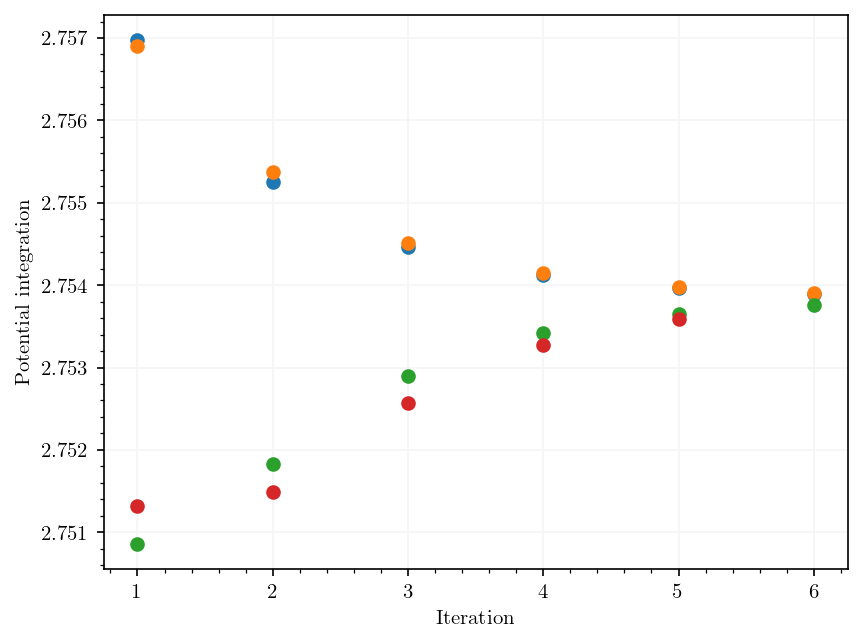

: 

In [80]:
fig_conv